In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
import praw
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/dinesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dinesh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/dinesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/dinesh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Authentication

In [15]:
reddit = praw.Reddit(
    client_id="NZwWZ378wErnUGUeAGDZvw",
    client_secret="wicn4y2LoRnMy87WwuMyNNgjylVRBA",  
    user_agent="STOCK SCRAPER (by u/Far-Bridge4448)" 
)

# choosing sub-reddit

In [16]:
subreddit = reddit.subreddit("stocks")  

# Accessing a Subreddit with PRAW

In [17]:
for post in subreddit.hot(limit=50):  # Use .new(), .top(), or .rising() for different types
    print(post.title)
    print(f"Title: {post.title}")
    print(f"Score: {post.score}")
    print(f"Comments: {post.num_comments}")
    print(f"Post URL: {post.url}")
    print("-" * 50)

Rate My Portfolio - r/Stocks Quarterly Thread December 2024
Title: Rate My Portfolio - r/Stocks Quarterly Thread December 2024
Score: 13
Comments: 120
Post URL: https://www.reddit.com/r/stocks/comments/1h403u4/rate_my_portfolio_rstocks_quarterly_thread/
--------------------------------------------------
r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024
Title: r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024
Score: 1
Comments: 1
Post URL: https://www.reddit.com/r/stocks/comments/1h767sx/rstocks_daily_discussion_options_trading_thursday/
--------------------------------------------------
Expected returns have gotten insane.
Title: Expected returns have gotten insane.
Score: 107
Comments: 45
Post URL: https://www.reddit.com/r/stocks/comments/1h7147x/expected_returns_have_gotten_insane/
--------------------------------------------------
Meta Announces $10 Billion Data Center in Louisiana
Title: Meta Announces $10 Billion Data Center in Louisiana
Score: 

# Exploring Subreddit Attributes

In [18]:
print(f"Subreddit Name: {subreddit.display_name}")
print(f"Title: {subreddit.title}")
print(f"Description: {subreddit.public_description}")
print(f"Subscribers: {subreddit.subscribers}")

Subreddit Name: stocks
Title: Stocks - Investing and trading for all
Description: Welcome on /r/stocks! Don't hesitate to tell us about a ticker we should know about, market news or financial education. But please, read the sidebar rules before you post.

Check out our wiki to learn more!
Subscribers: 8181866


# Scrape Posts

In [19]:
print("Fetching posts from r/stocks...")
posts = []
for post in subreddit.hot(limit=150):  # Fetch top 50 hot posts
    posts.append({
        "title": post.title,
        "selftext": post.selftext,  # The body of the post
        "upvotes": post.score,  # Upvote count
        "comments": post.num_comments,  # Number of comments
        "url": post.url  # URL to the post
    })

# Step 4: Display Results
for i, post in enumerate(posts, start=1):
    print(f"Post #{i}: {post['title']}")
    print(f"Upvotes: {post['upvotes']}, Comments: {post['comments']}")
    print(f"Content: {post['selftext'][:200]}...")  # Print first 200 characters
    print(f"URL: {post['url']}")
    print("-" * 80)

print("Scraping complete!")

Fetching posts from r/stocks...
Post #1: Rate My Portfolio - r/Stocks Quarterly Thread December 2024
Upvotes: 12, Comments: 120
Content: Please use this thread to discuss your portfolio, learn of other stock tickers, and help out users by giving constructive criticism.

Why quarterly?  Public companies report earnings quarterly; many i...
URL: https://www.reddit.com/r/stocks/comments/1h403u4/rate_my_portfolio_rstocks_quarterly_thread/
--------------------------------------------------------------------------------
Post #2: r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024
Upvotes: 1, Comments: 1
Content: This is the daily discussion, so anything stocks related is fine, but the theme for today is on stock options, but if options aren't your thing then just ignore the theme.

Some helpful day to day lin...
URL: https://www.reddit.com/r/stocks/comments/1h767sx/rstocks_daily_discussion_options_trading_thursday/
-------------------------------------------------------------

In [20]:
def preprocess(text):
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    
    # Tokenize and clean
    words = word_tokenize(text.lower())
    filtered_words = [
        lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words
    ]
    return " ".join(filtered_words)

for post in posts:
    post["cleaned_title"] = preprocess(post["title"])  # Process the title
    post["cleaned_content"] = preprocess(post["selftext"])  # Process the content

In [21]:
import re
from nltk.corpus import stopwords

In [22]:
data = pd.DataFrame({'text': ["Check out https://example.com for more info!",
                              "This is a sample post with some @mentions and #hashtags.",
                              "Another post without any links."]})

# Remove URLs
data['clean_text'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Lowercase the text
data['clean_text'] = data['clean_text'].str.lower()

# Remove special characters and digits
data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove stop words
stop_words = set(stopwords.words('english'))
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Display the cleaned data
print(data[['text', 'clean_text']])

                                                text  \
0       Check out https://example.com for more info!   
1  This is a sample post with some @mentions and ...   
2                    Another post without any links.   

                      clean_text  
0                     check info  
1  sample post mentions hashtags  
2     another post without links  


# Save to CSV

In [23]:
df = pd.DataFrame(posts)  # Convert list of dicts to DataFrame
df.to_csv("reddit_data.csv", index=False)
print("Data saved to reddit_data.csv")

Data saved to reddit_data.csv


In [24]:
features = pd.DataFrame({
    'sentiment': [TextBlob(post['title'] + " " + post.get('selftext', '')).sentiment.polarity for post in posts],
    'upvotes': [post['upvotes'] for post in posts],
    'comments': [post['comments'] for post in posts]
})

# Example label: Assuming you want to predict stock movement (up/down)
labels = [1 if post['upvotes'] > 100 else 0 for post in posts]  # Replace with your actual target logic

In [25]:
for post in posts:
    sentiment = TextBlob(post['title']).sentiment.polarity
    print(f"Post: {post['title']}\nSentiment Score: {sentiment}\n")

Post: Rate My Portfolio - r/Stocks Quarterly Thread December 2024
Sentiment Score: 0.0

Post: r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024
Sentiment Score: 0.0

Post: Expected returns have gotten insane.
Sentiment Score: -0.55

Post: Meta Announces $10 Billion Data Center in Louisiana
Sentiment Score: -0.1

Post: Do you guys believe we are in the beginning of “the great melt up” or that a recession is coming in the somewhat near future ?
Sentiment Score: 0.3

Post: TSMC in talks with Nvidia for AI chip production in Arizona
Sentiment Score: 0.0

Post: Intel’s CEO shakeup puts foundry plans, CHIPS Act cash at risk
Sentiment Score: 0.0

Post: Amazon sued by DC attorney general for allegedly excluding neighborhoods from Prime delivery
Sentiment Score: -0.024999999999999994

Post: Bolivia Signs Major Lithium Deal – Not Great News for Lithium Players
Sentiment Score: -0.16875

Post: Shares of American Eagle plunge 13% as company issues weak holiday guidance
Sentiment 

# Preprocessing

# Topic Modeling

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


In [27]:


# Adjust min_df and max_df as needed
vectorizer = CountVectorizer(max_df=0.85, min_df=1, stop_words='english')
data_vectorized = vectorizer.fit_transform(data)

# Check the shape of the transformed data
print("Shape of data vectorized:", data_vectorized.shape)



Shape of data vectorized: (2, 2)


In [28]:
# Initialize and fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(data_vectorized)



LatentDirichletAllocation(n_components=5, random_state=42)

In [29]:
# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[:-11:-1]])

Topic #0:
['text', 'clean_text']
Topic #1:
['text', 'clean_text']
Topic #2:
['clean_text', 'text']
Topic #3:
['text', 'clean_text']
Topic #4:
['clean_text', 'text']


In [30]:
import re

# List of stock tickers to count

In [31]:

stock_tickers = ['AAPL', 'TSLA', 'GOOG', 'MSFT']

# Initialize a dictionary to hold the counts
stock_mentions_count = {ticker: 0 for ticker in stock_tickers}

In [32]:
# Loop through your data and count stock mentions
for post in posts:
    text = post['title'] + " " + post['selftext']  # Combine title and content for analysis

    for ticker in stock_tickers:
        # Use a case-insensitive match to find tickers in the text
        if re.search(r'\b' + re.escape(ticker) + r'\b', text, re.IGNORECASE):
            stock_mentions_count[ticker] += 1

print("Stock Mentions Count:", stock_mentions_count)

Stock Mentions Count: {'AAPL': 3, 'TSLA': 7, 'GOOG': 2, 'MSFT': 2}


In [33]:
# Debug print to check the content of text
for i, post in enumerate(posts[:5]):  # Print the first 5 posts for verification
    text = post['title'] + " " + post['selftext']
    print(f"Post #{i + 1}: {text}")


Post #1: Rate My Portfolio - r/Stocks Quarterly Thread December 2024 Please use this thread to discuss your portfolio, learn of other stock tickers, and help out users by giving constructive criticism.

Why quarterly?  Public companies report earnings quarterly; many investors take this as an opportunity to rebalance their portfolios.  We highly recommend you do some reading:  A list of [relevant posts & book recommendations.](https://www.reddit.com/r/stocks/wiki/index#wiki_relevant_posts_.26amp.3B_book_recommendations)

You can find stocks on your own by using a scanner like your broker's or [Finviz.](https://finviz.com/screener.ashx)  To help further, here's a list of [relevant websites.](https://www.reddit.com/r/stocks/wiki/index#wiki_relevant_websites.2Fapps)

If you don't have a broker yet, see our [list of brokers](https://www.reddit.com/r/stocks/wiki/index#wiki_brokers_for_investing) or search old posts.  If you haven't started investing or trading yet, then setup your [paper tr

# Sentiment Polarity:

In [34]:
from textblob import TextBlob

for post in posts:
    text = post['title'] + " " + (post['selftext'] if post['selftext'] else "")
    if isinstance(text, str) and text.strip():  # Check if text is a non-empty string
        sentiment = TextBlob(text).sentiment.polarity
        print(f"Sentiment for post '{post['title']}': {sentiment}")
    else:
        print(f"Post '{post['title']}' has no valid content.")


Sentiment for post 'Rate My Portfolio - r/Stocks Quarterly Thread December 2024': 0.18602564102564104
Sentiment for post 'r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024': -0.00023809523809523725
Sentiment for post 'Expected returns have gotten insane.': -0.37
Sentiment for post 'Meta Announces $10 Billion Data Center in Louisiana': 0.0924025974025974
Sentiment for post 'Do you guys believe we are in the beginning of “the great melt up” or that a recession is coming in the somewhat near future ?': 0.16500000000000004
Sentiment for post 'TSMC in talks with Nvidia for AI chip production in Arizona': 0.09684491978609625
Sentiment for post 'Intel’s CEO shakeup puts foundry plans, CHIPS Act cash at risk': 0.13080728123101004
Sentiment for post 'Amazon sued by DC attorney general for allegedly excluding neighborhoods from Prime delivery': 0.036230907457322555
Sentiment for post 'Bolivia Signs Major Lithium Deal – Not Great News for Lithium Players': 0.046924603174603174
S

Sentiment for post 'Ganja Bear Case (and one possible exception)': 0.10222264437689965
Sentiment for post 'Evaluation of Companies with Down Revenue': 0.041584967320261436
Sentiment for post 'Anyone else concerned with this rally?': 0.19642857142857142
Sentiment for post 'Games Workshop up 15% following higher than expected quarterly sales!': 0.10543455387205386
Sentiment for post 'Delaware Funds by Macquarie': -0.05304824561403508
Sentiment for post 'Anyone knows which website is showing stocks performance in many green tiles and red tiles?': 0.09047619047619047
Sentiment for post 'AMD: The $145 Recovery Rally is Coming Next Week': -0.0011363636363636344
Sentiment for post '/r/Stocks Weekend Discussion Saturday - Nov 23, 2024': -0.05
Sentiment for post 'r/Stocks Weekly Thread on Meme Stocks Saturday - Nov 23, 2024': 0.24494047619047618
Sentiment for post 'What I learnt from MSTR frenzy': -0.0024888888888888894
Sentiment for post 'Thoughts and dilemma on Rocket Lab? ': 0.20277777777777

In [35]:
for post in posts:
    title = str(post['title']) if post['title'] else ""
    selftext = str(post['selftext']) if post['selftext'] else ""
    text = title + " " + selftext
    if text.strip():  # Ensure non-empty content
        sentiment = TextBlob(text).sentiment.polarity
        print(f"Sentiment for post '{post['title']}': {sentiment}")
    else:
        print(f"Post '{post['title']}' has no valid content.")


Sentiment for post 'Rate My Portfolio - r/Stocks Quarterly Thread December 2024': 0.18602564102564104
Sentiment for post 'r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024': -0.00023809523809523725
Sentiment for post 'Expected returns have gotten insane.': -0.37
Sentiment for post 'Meta Announces $10 Billion Data Center in Louisiana': 0.0924025974025974
Sentiment for post 'Do you guys believe we are in the beginning of “the great melt up” or that a recession is coming in the somewhat near future ?': 0.16500000000000004
Sentiment for post 'TSMC in talks with Nvidia for AI chip production in Arizona': 0.09684491978609625
Sentiment for post 'Intel’s CEO shakeup puts foundry plans, CHIPS Act cash at risk': 0.13080728123101004
Sentiment for post 'Amazon sued by DC attorney general for allegedly excluding neighborhoods from Prime delivery': 0.036230907457322555
Sentiment for post 'Bolivia Signs Major Lithium Deal – Not Great News for Lithium Players': 0.046924603174603174
S

Sentiment for post 'Rivian Receives Conditional Commitment for up to $6.6 Billion Loan from the U.S. Department of Energy': 0.09457781275963094
Sentiment for post 'These are the stocks on my watchlist (11/26)': 0.017959770114942517
Sentiment for post 'Opinions on ZETA?': 0.09158730158730158
Sentiment for post 'Does ENPH still has a moat?': 0.1383116883116883
Sentiment for post 'California plan excludes Tesla from new EV tax credits, governor's office says': -0.013090728715728714
Sentiment for post 'Long term investors, what’s your thoughts on recent VFV/vanguard movement?': 0.11772959183673468
Sentiment for post 'For buying stocks for long term. Do you guys think is better to use 200EMA on daily or weekly chart? ': 0.09
Sentiment for post 'What’s your plan for Dec / 2025?': 0.09166666666666667
Sentiment for post 'r/Stocks Daily Discussion & Technicals Tuesday - Nov 26, 2024': -0.011217948717948716
Sentiment for post 'Why MicroStrategy Stock Rocketed 24.7% Higher This Week': 0.250361305

In [36]:
for post in posts:
    title = post['title']
    selftext = post['selftext']
    if isinstance(title, str) and isinstance(selftext, str):
        text = title + " " + selftext
        sentiment = TextBlob(text).sentiment.polarity
        print(f"Sentiment for post '{title}': {sentiment}")
    else:
        print(f"Invalid content in post '{post['title']}'.")


Sentiment for post 'Rate My Portfolio - r/Stocks Quarterly Thread December 2024': 0.18602564102564104
Sentiment for post 'r/Stocks Daily Discussion & Options Trading Thursday - Dec 05, 2024': -0.00023809523809523725
Sentiment for post 'Expected returns have gotten insane.': -0.37
Sentiment for post 'Meta Announces $10 Billion Data Center in Louisiana': 0.0924025974025974
Sentiment for post 'Do you guys believe we are in the beginning of “the great melt up” or that a recession is coming in the somewhat near future ?': 0.16500000000000004
Sentiment for post 'TSMC in talks with Nvidia for AI chip production in Arizona': 0.09684491978609625
Sentiment for post 'Intel’s CEO shakeup puts foundry plans, CHIPS Act cash at risk': 0.13080728123101004
Sentiment for post 'Amazon sued by DC attorney general for allegedly excluding neighborhoods from Prime delivery': 0.036230907457322555
Sentiment for post 'Bolivia Signs Major Lithium Deal – Not Great News for Lithium Players': 0.046924603174603174
S

Sentiment for post 'Deep dive into Kering - From Timber to Gucci: A Legacy of Acquisitions': 0.08378125679495542
Sentiment for post 'Looking for advice: combining technical analysis with news-based and high-volatility trading': 0.09895833333333333
Sentiment for post '$Dell Earnings ': -0.005555555555555564
Sentiment for post 'RDDT Q4 prognosis': 0.1473737373737374
Sentiment for post 'r/Stocks Daily Discussion Wednesday - Nov 27, 2024': -0.045454545454545456
Sentiment for post 'Rivian Receives Conditional Commitment for up to $6.6 Billion Loan from the U.S. Department of Energy': 0.09457781275963094
Sentiment for post 'These are the stocks on my watchlist (11/26)': 0.017959770114942517
Sentiment for post 'Opinions on ZETA?': 0.09158730158730158
Sentiment for post 'Does ENPH still has a moat?': 0.1383116883116883
Sentiment for post 'California plan excludes Tesla from new EV tax credits, governor's office says': -0.013090728715728714
Sentiment for post 'Long term investors, what’s your t

In [37]:
sentiment_scores = []
for post in posts:
    text = post['title'] + " " + (post['selftext'] if post['selftext'] else "")
    if isinstance(text, str) and text.strip():  # Check if text is a non-empty string
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_scores.append(sentiment)
    else:
        print(f"Post '{post['title']}' has no valid content.")


In [38]:
if sentiment_scores:  # Check if the list is not empty
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    print("Average Sentiment Score:", avg_sentiment)
else:
    print("No valid sentiment scores to calculate average.")


Average Sentiment Score: 0.06815266548230256


# Training the models

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the model

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model

In [41]:
 accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9666666666666667


# prediction

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


# Precision and Recall

In [45]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.8


# F1 Score

In [46]:

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.888888888888889


# AUC-ROC Curve (requires probability predictions)

In [47]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

# Calculate AUC

In [48]:
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

AUC: 1.0


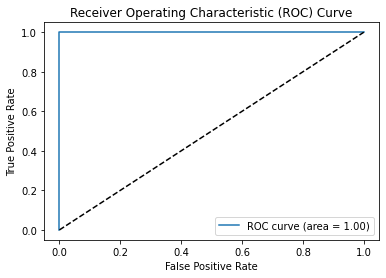

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_prob are defined
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [50]:
numerical_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numerical_df.corr()

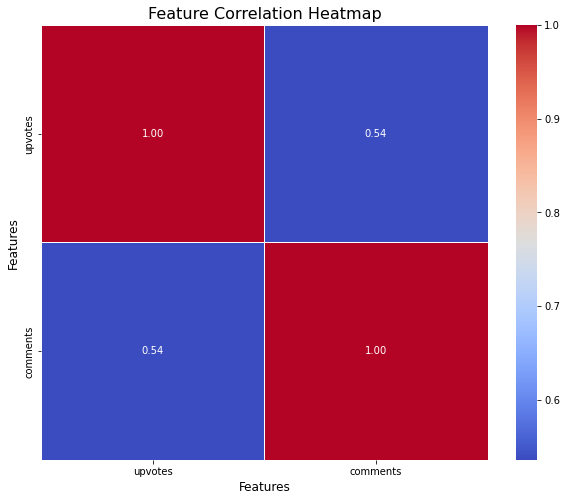

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()


In [52]:
# Print predictions with additional details
print("\nPredicted Stock Movements with Confidence Scores:")
for i, (prediction, proba) in enumerate(zip(y_pred, model.predict_proba(X_test))):
    stock_movement = "up" if prediction == 1 else "down"
    confidence_score = max(proba)  # The confidence score for the prediction
    print(f"Post #{i+1}: The predicted stock movement is {stock_movement} with a confidence score of {confidence_score:.2%}.")



Predicted Stock Movements with Confidence Scores:
Post #1: The predicted stock movement is down with a confidence score of 90.00%.
Post #2: The predicted stock movement is down with a confidence score of 100.00%.
Post #3: The predicted stock movement is down with a confidence score of 100.00%.
Post #4: The predicted stock movement is down with a confidence score of 94.00%.
Post #5: The predicted stock movement is down with a confidence score of 100.00%.
Post #6: The predicted stock movement is down with a confidence score of 91.00%.
Post #7: The predicted stock movement is down with a confidence score of 100.00%.
Post #8: The predicted stock movement is down with a confidence score of 98.00%.
Post #9: The predicted stock movement is down with a confidence score of 100.00%.
Post #10: The predicted stock movement is down with a confidence score of 95.00%.
Post #11: The predicted stock movement is down with a confidence score of 87.00%.
Post #12: The predicted stock movement is down with

In [53]:
y_pred_proba = model.predict_proba(features)
for i, (prediction, proba, post) in enumerate(zip(y_pred, y_pred_proba, posts)):
    stock_movement = "up" if prediction == 1 else "down"
    confidence_score = max(proba)  # The highest probability as the confidence score
    print(f"Post #{i+1}: Title:{post['title'][:50]}.. -The predicted stock movement is {stock_movement} with a score of {confidence_score:.2%}.")


Post #1: Title:Rate My Portfolio - r/Stocks Quarterly Thread Dece.. -The predicted stock movement is down with a score of 98.00%.
Post #2: Title:r/Stocks Daily Discussion & Options Trading Thursd.. -The predicted stock movement is down with a score of 100.00%.
Post #3: Title:Expected returns have gotten insane... -The predicted stock movement is down with a score of 85.00%.
Post #4: Title:Meta Announces $10 Billion Data Center in Louisian.. -The predicted stock movement is down with a score of 98.00%.
Post #5: Title:Do you guys believe we are in the beginning of “th.. -The predicted stock movement is down with a score of 98.00%.
Post #6: Title:TSMC in talks with Nvidia for AI chip production i.. -The predicted stock movement is down with a score of 100.00%.
Post #7: Title:Intel’s CEO shakeup puts foundry plans, CHIPS Act .. -The predicted stock movement is down with a score of 99.00%.
Post #8: Title:Amazon sued by DC attorney general for allegedly e.. -The predicted stock movement is d